In [1]:
#This notebook serves a capstone project requirement for "Full Stack Data Science -April 2020" program of Jigsaw Academy

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#os.getcwd()

In [2]:
data=pd.read_excel('Student Applications & Performance.xlsx',sheet_name='University information')
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


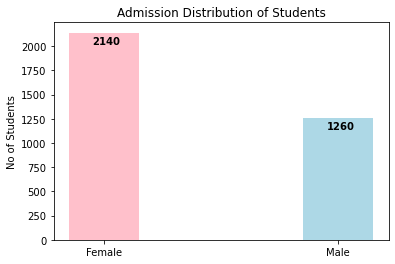

In [3]:
x=data['STDNT_GENDER'].unique()
y=data.groupby('STDNT_GENDER').agg({'STDNT_GENDER':np.size})
y=y.iloc[:,0]

plt.bar(x,y,width=0.3,color=['pink','lightblue'],align='center')
plt.xticks(x, ('Female', 'Male'))
plt.ylabel('No of Students')
plt.title('Admission Distribution of Students')

for index, value in enumerate(y):
    plt.text(index-0.05,value-120, str(value),fontsize = 10, fontweight ='bold', color ='black')

plt.show()

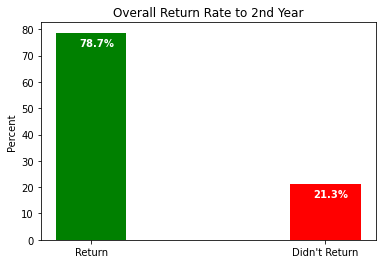

In [4]:
x=data['RETURNED_2ND_YR'].unique()
y=round(data['RETURNED_2ND_YR'].value_counts()/data.shape[0]*100,1)

plt.bar(x,y,width=0.3,color=['green','red'],align='center')
plt.xticks(x, ('Return', 'Didn\'t Return'))
plt.ylabel('Percent')
plt.title('Overall Return Rate to 2nd Year')

for index, value in enumerate(y):
    plt.text(index-0.05,value-5, str(value)+'%',fontsize = 10, fontweight ='bold', color ='white')

plt.show()

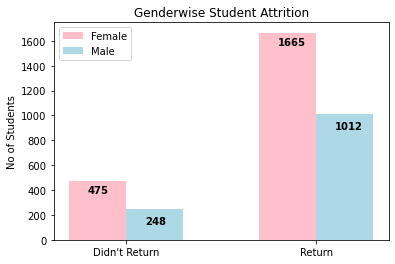

In [5]:
x=data['RETURNED_2ND_YR'].unique()
y=data.groupby(['RETURNED_2ND_YR','STDNT_GENDER']).agg({'RETURNED_2ND_YR':np.size})
y1=y.iloc[[0,2],0]
y2=y.iloc[[1,3],0]

plt.bar(x,y1, width = 0.3, color = 'pink',  align='center',label='Female')
plt.bar(x+0.3,y2, width = 0.3, color = 'lightblue',  align='center',label='Male')
plt.xticks(x + 0.3 / 2, ('Didn\'t Return', 'Return'))
plt.ylabel('No of Students')
plt.legend(loc='best')
plt.title('Genderwise Student Attrition')

for index, value in enumerate(y1):
    plt.text(index-0.05,value-100, str(value),fontsize = 10, fontweight ='bold', color ='black')

for index, value in enumerate(y2):
    plt.text(index+0.25,value-120, str(value),fontsize = 10, fontweight ='bold', color ='black')

plt.show()

In [181]:
#Feature-engineering by combining first term and second term to make 'SESSION' column for further analysis with other columns
data[['FIRST_TERM','SECOND_TERM']]=data[['FIRST_TERM','SECOND_TERM']].astype(str)
data['SESSION']=data['FIRST_TERM'].str.extract('(\d\d\d\d)',expand=False)+'-'+data['SECOND_TERM'].str.extract('(\d\d\d\d)',expand=False)
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,SESSION
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,Bachelors,16,16,14.0,14.0,0,0,0,0.0,2007-2008
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0,2008-2009
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,Bachelors,15,15,14.0,14.0,0,0,0,0.0,2010-2011
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,Bachelors,13,13,14.0,14.0,0,0,0,0.0,2007-2008
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0,2008-2009


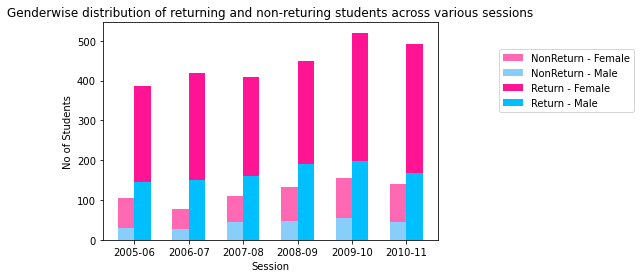

In [7]:
#Gender wise distribution of returning and non-returing students
df=data.groupby(['SESSION','STDNT_GENDER','RETURNED_2ND_YR']).agg({'RETURNED_2ND_YR':np.size})
df1=df.unstack(level=0)
x=np.arange(len(df.index.levels[0]))
y1=df1.loc[('F',0),:]
y2=df1.loc[('F',1),:]
y3=df1.loc[('M',0),:]
y4=df1.loc[('M',1),:]
plt.bar(x,y1+y3, width = 0.3, color = 'hotpink',  align='center',label='NonReturn - Female')
plt.bar(x,y3, width = 0.3, color = 'lightskyblue',  align='center',label='NonReturn - Male')
plt.bar(x+0.3,y2+y4, width = 0.3, color = 'deeppink',  align='center',label='Return - Female')
plt.bar(x+0.3,y4, width = 0.3, color = 'deepskyblue',  align='center',label='Return - Male')
plt.xticks(x + 0.3 / 2, ('2005-06', '2006-07','2007-08','2008-09','2009-10','2010-11'))
plt.xlabel('Session')
plt.ylabel('No of Students')
plt.title('Genderwise distribution of returning and non-returing students across various sessions')
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.4, 0.7, 0.5), fontsize='medium')
plt.show()

In [182]:
#Combining STDNT_MAJOR in order to reduce its unique values
#Create a list of conditions
conditions=[
    (data['STDNT_MAJOR']== 'Art')|(data['STDNT_MAJOR']== 'Art Education')|(data['STDNT_MAJOR']== 'Liberal Arts'),
    (data['STDNT_MAJOR']== 'Biology')|(data['STDNT_MAJOR']== 'Biology and Secondary Ed'),
    (data['STDNT_MAJOR']== 'Chemistry')|(data['STDNT_MAJOR']== 'Chemistry and Secondary Ed'),
    (data['STDNT_MAJOR']== 'Computer Science - Systems')|(data['STDNT_MAJOR']== 'Computer Science - Games')|(data['STDNT_MAJOR']== 'Applied Computer Science')|(data['STDNT_MAJOR']== 'Information Technology'),
    (data['STDNT_MAJOR']== 'Exercise Science')|(data['STDNT_MAJOR']== 'Health Science')|(data['STDNT_MAJOR']== 'Health and Physical Education'),
    (data['STDNT_MAJOR']== 'Engineering Studies')|(data['STDNT_MAJOR']== 'Pre-Engineering/RETP'),
    (data['STDNT_MAJOR']== 'English Language/Literature')|(data['STDNT_MAJOR']== 'English and Secondary Ed'),
    (data['STDNT_MAJOR']== 'French')|(data['STDNT_MAJOR']== 'French with Teacher Cert'),
    (data['STDNT_MAJOR']== 'Accounting')|(data['STDNT_MAJOR']== 'Communication')|(data['STDNT_MAJOR']== 'Pre-Business')|(data['STDNT_MAJOR']== 'Management')|(data['STDNT_MAJOR']== 'Management Information Systems')|(data['STDNT_MAJOR']== 'Marketing')|(data['STDNT_MAJOR']== 'General Business')|(data['STDNT_MAJOR']== 'Finance'),
    (data['STDNT_MAJOR']== 'Geology')|(data['STDNT_MAJOR']== 'Earth and Space Science'),
    (data['STDNT_MAJOR']== 'History')|(data['STDNT_MAJOR']== 'History and Secondary Ed'),
    (data['STDNT_MAJOR']== 'Mathematics')|(data['STDNT_MAJOR']== 'Mathematics and Secondary Ed'),
    (data['STDNT_MAJOR']== 'Music')|(data['STDNT_MAJOR']== 'Music Education')|(data['STDNT_MAJOR']== 'Music Performance'),
    (data['STDNT_MAJOR']== 'Nursing')|(data['STDNT_MAJOR']== 'Pre-Nursing'),
    (data['STDNT_MAJOR']== 'Spanish')|(data['STDNT_MAJOR']== 'Spanish with Teacher Cert'),
    (data['STDNT_MAJOR']== 'Early Childhood Education')|(data['STDNT_MAJOR']== 'Spec Ed: Gen. Curr. - Reading')|(data['STDNT_MAJOR']== 'Middle Grades Education'),
    (data['STDNT_MAJOR']== 'Early Admission - Accel')|(data['STDNT_MAJOR']== 'Joint Enrollment - Accel'),
    (data['STDNT_MAJOR']== 'Political Science')|(data['STDNT_MAJOR']== 'Psychology')|(data['STDNT_MAJOR']== 'Sociology')|(data['STDNT_MAJOR']== 'General Studies/AS')|(data['STDNT_MAJOR']== 'Criminal Justice'),
    (data['STDNT_MAJOR']== 'Theatre Arts')|(data['STDNT_MAJOR']== 'Theatre Education'),
    (data['STDNT_MAJOR']== 'Undeclared')]
    
#Create a list of values we want to assign to each condition
values =['Art','Biology','Chemistry','Computer Science','Health and Physical Education','Engineering','English','French','Management Studies',
         'Geo Science','History','Mathematics','Music','Nursing','Spanish','Education','Accel - Program','General Studies','Theatre Art','Undeclared']
#Create a new column based on above conditons and values
data['STREAM']=np.select(conditions,values)

data.head() 

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,SESSION,STREAM
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,16,16,14.0,14.0,0,0,0,0.0,2007-2008,Undeclared
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,18,18,18.0,18.0,570000,1355760,785760,459300.0,2008-2009,Undeclared
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,15,15,14.0,14.0,0,0,0,0.0,2010-2011,Mathematics
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,13,13,14.0,14.0,0,0,0,0.0,2007-2008,Undeclared
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,12,12,12.0,12.0,835920,1355760,519840,278340.0,2008-2009,Art


In [183]:
#Further reduction
conditions=[(data['STREAM']=='Art')|(data['STREAM']=='Music')|(data['STREAM']=='Theatre Art'),
           (data['STREAM']=='Biology')|(data['STREAM']=='Chemistry')|(data['STREAM']=='Mathematics'),
           (data['STREAM']=='French')|(data['STREAM']=='Spanish')|(data['STREAM']=='English'),
           (data['STREAM']=='History')|(data['STREAM']=='General Studies'),
           (data['STREAM']=='Engineering')|(data['STREAM']=='Geo Science'),
           (data['STREAM']=='Management Studies')|(data['STREAM']=='Accel - Program'), 
           (data['STREAM']=='Computer Science'),(data['STREAM']=='Health and Physical Education'),
           (data['STREAM']=='Nursing'),(data['STREAM']=='Education'),(data['STREAM']=='Undeclared')]
           
values=['Art,Music and Theatre','Pure Science','Languages','Humanities','Engineering and Applied Science','Management and Business Studies',
        'CS and IT','Health and Physical Education','Nursing','Education','Undeclared']

data['STREAM']=np.select(conditions,values)
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,SESSION,STREAM
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,16,16,14.0,14.0,0,0,0,0.0,2007-2008,Undeclared
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,18,18,18.0,18.0,570000,1355760,785760,459300.0,2008-2009,Undeclared
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,15,15,14.0,14.0,0,0,0,0.0,2010-2011,Pure Science
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,13,13,14.0,14.0,0,0,0,0.0,2007-2008,Undeclared
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,12,12,12.0,12.0,835920,1355760,519840,278340.0,2008-2009,"Art,Music and Theatre"


In [10]:
df=data.groupby(['SESSION','STREAM']).agg({'STREAM':np.size})

<ipython-input-11-2e467ac23ccf>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[0,0].pie(sizes, autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
<ipython-input-11-2e467ac23ccf>:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[0,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
<ipython-input-11-2e467ac23ccf>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[1,0].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
<ipython-input-11-2e467ac23ccf>:24: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this beh

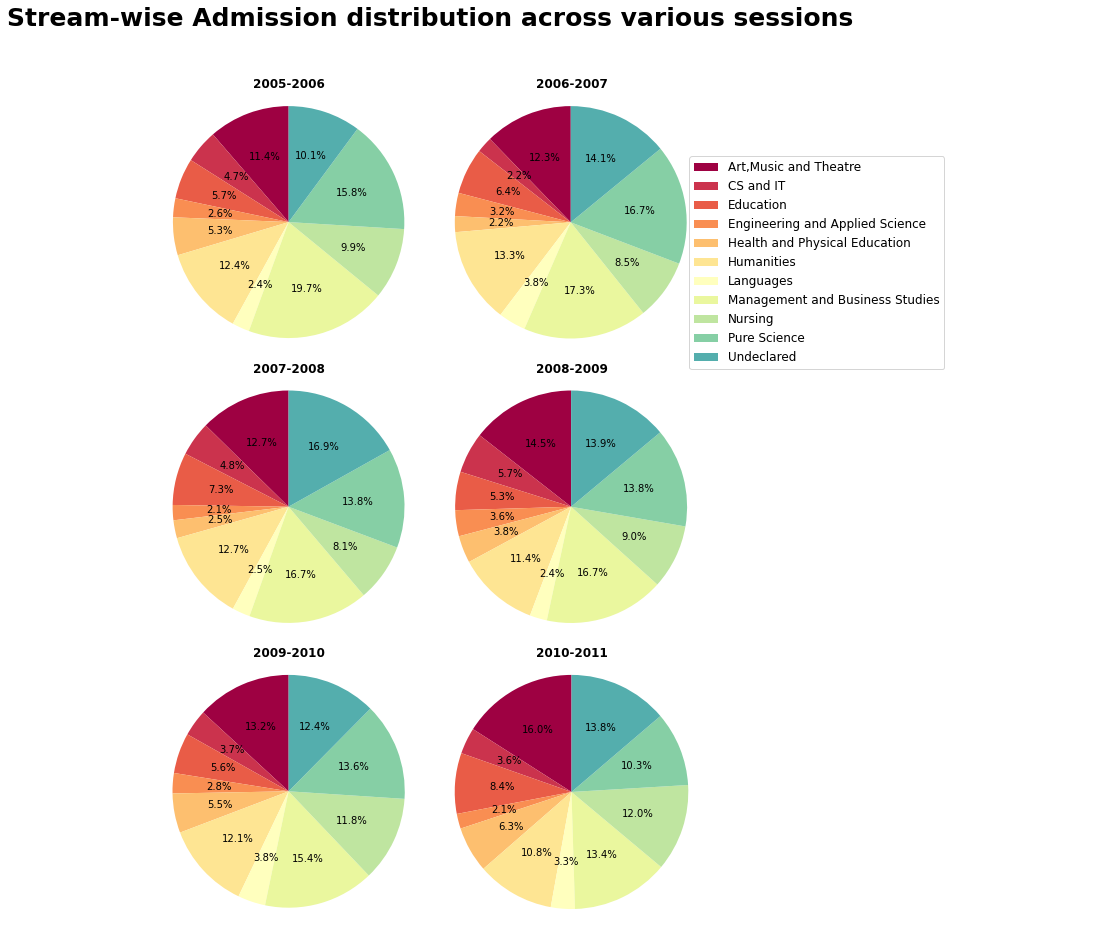

In [11]:
labels=df.index.get_level_values(1).unique()
#fig, ax = plt.subplots(3, 2,figsize=(15, 4))
fig, ax = plt.subplots(3, 2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 13)]

sizes=df.loc[('2005-2006'),:]
ax[0,0].pie(sizes, autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,0].set_title('2005-2006', fontweight='bold')

sizes=df.loc[('2006-2007'),:]
ax[0,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].set_title('2006-2007', fontweight='bold')

sizes=df.loc[('2007-2008'),:]
ax[1,0].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].set_title('2007-2008', fontweight='bold')

sizes=df.loc[('2008-2009'),:]
ax[1,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].set_title('2008-2009', fontweight='bold')

sizes=df.loc[('2009-2010'),:]
ax[2,0].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[2,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2,0].set_title('2009-2010', fontweight='bold')


sizes=df.loc[('2010-2011'),:]
ax[2,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[2,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2,1].set_title('2010-2011', fontweight='bold')

fig.suptitle('Stream-wise Admission distribution across various sessions', fontsize=25, y=1.07, fontweight='bold', x=0.5)
fig.set_figheight(12)
fig.set_figwidth(8)
fig.legend(loc='best', bbox_to_anchor=(0.95, 0.4, 0.7, 0.5), labels=labels, fontsize='large')
fig.tight_layout()

plt.show()

<ipython-input-12-6aad0db047d6>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[0,0].pie(sizes, autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
<ipython-input-12-6aad0db047d6>:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[0,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
<ipython-input-12-6aad0db047d6>:19: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax[1,0].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
<ipython-input-12-6aad0db047d6>:24: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this beh

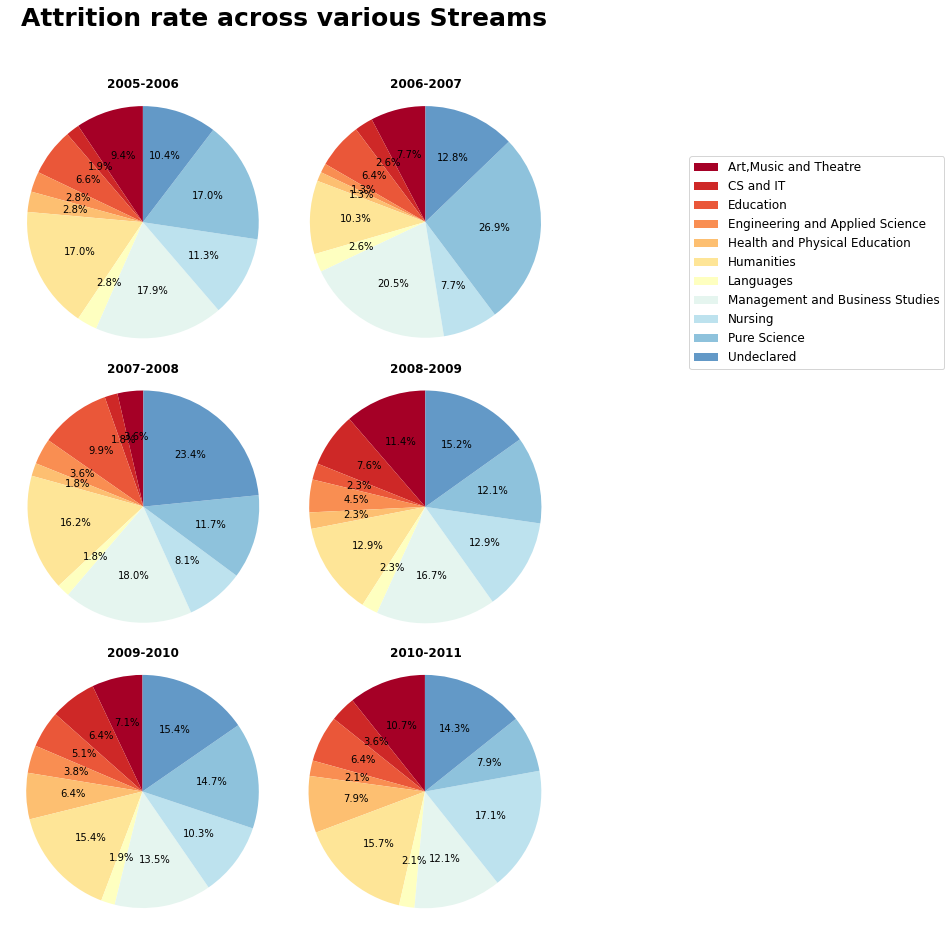

In [12]:
df=data.groupby(['RETURNED_2ND_YR','SESSION','STREAM']).agg({'STREAM':np.size})
labels=df.index.get_level_values(2).unique()
fig, ax = plt.subplots(3, 2)

cmap = plt.get_cmap('RdYlBu')
colors = [cmap(i) for i in np.linspace(0, 1, 13)]

sizes=df.loc[0,'2005-2006']
ax[0,0].pie(sizes, autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,0].set_title('2005-2006', fontweight='bold')

sizes=df.loc[0,'2006-2007']
ax[0,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].set_title('2006-2007', fontweight='bold')

sizes=df.loc[0,'2007-2008']
ax[1,0].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].set_title('2007-2008', fontweight='bold')

sizes=df.loc[0,'2008-2009']
ax[1,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].set_title('2008-2009', fontweight='bold')

sizes=df.loc[0,'2009-2010']
ax[2,0].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[2,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2,0].set_title('2009-2010', fontweight='bold')


sizes=df.loc[0,'2010-2011']
ax[2,1].pie(sizes,autopct='%1.1f%%',shadow=False, colors=colors,startangle=90)
ax[2,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2,1].set_title('2010-2011', fontweight='bold')

fig.suptitle('Attrition rate across various Streams', fontsize=25, y=1.07, fontweight='bold', x=0.5)
fig.set_figheight(12)
fig.set_figwidth(8)
fig.legend(loc='best', bbox_to_anchor=(0.95, 0.4, 0.7, 0.5), labels=labels, fontsize='large')
fig.tight_layout()

plt.show()

In [13]:
%run dqr.py
report=dataQuality(data)

<Figure size 432x288 with 0 Axes>

In [14]:
report['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Var,Q1,Q3,q99
STUDENT IDENTIFIER,3400.0,3400.0,0.000000,7755837.0,8037098.0,7.897155e+06,7899052.5,80834.212657,6.534170e+09,7827039.25,7964008.00,8034112.56
STDNT_AGE,3400.0,11.0,0.000000,16.0,26.0,1.799412e+01,18.0,0.552052,3.047609e-01,18.00,18.00,19.00
STDNT_TEST_ENTRANCE1,1106.0,24.0,0.674706,8.0,32.0,2.066004e+01,20.0,3.234734,1.046351e+01,18.00,22.00,30.00
STDNT_TEST_ENTRANCE2,2492.0,110.0,0.267059,350.0,1490.0,9.650923e+02,990.0,209.088633,4.371806e+04,900.00,1100.00,1350.90
STDNT_TEST_ENTRANCE_COMB,2882.0,25.0,0.152353,530.0,1510.0,9.977585e+02,990.0,156.268221,2.441976e+04,910.00,1110.00,1340.00
RETURNED_2ND_YR,3400.0,2.0,0.000000,0.0,1.0,7.873529e-01,1.0,0.409240,1.674775e-01,1.00,1.00,1.00
DISTANCE_FROM_HOME,3375.0,72.0,0.007353,0.0,5932.0,9.982519e+01,69.0,235.196984,5.531762e+04,69.00,138.00,666.00
HIGH_SCHL_GPA,3347.0,201.0,0.015588,0.0,4.0,3.202738e+00,3.2,0.455337,2.073318e-01,2.87,3.56,4.00
FATHER_HI_EDU_CD,2968.0,5.0,0.127059,1.0,4.0,2.560647e+00,3.0,0.681273,4.641333e-01,2.00,3.00,4.00
MOTHER_HI_EDU_CD,2911.0,5.0,0.143824,1.0,4.0,2.571281e+00,3.0,0.611729,3.742128e-01,2.00,3.00,4.00


In [15]:
report['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
STDNT_GENDER,3400,2,0,F,0.629412
STDNT_BACKGROUND,3400,8,0,BGD 1,0.612353
IN_STATE_FLAG,3400,2,0,Y,0.900882
INTERNATIONAL_STS,3400,2,0,N,0.992059
STDNT_MAJOR,3400,54,0,Undeclared,0.135294
STDNT_MINOR,3400,37,0,N,0.929412
FIRST_TERM,3400,6,0,200908,0.198824
CORE_COURSE_NAME_1_F,3400,69,0,ENGL 1101,0.183529
CORE_COURSE_GRADE_1_F,3400,7,0,C,0.301176
CORE_COURSE_NAME_2_F,3301,75,0.0291176,ENGL 1101,0.216471


In [184]:
data_result=pd.DataFrame(data.loc[:,'STUDENT IDENTIFIER'])
data_result.head()

,STUDENT IDENTIFIER
0,7808615
1,7830063
2,7847538
3,8006429
4,7962680


In [185]:
#Based on initil data qualtiy report dropping columns having more than 15% of missing values and duplication of columns like "FATHER_HI_EDU_DESC" with "FATHER_HI_EDU_CD"
data.drop(['STUDENT IDENTIFIER','STDNT_MINOR','STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB','HIGH_SCHL_NAME'],axis=1,inplace=True)
data.drop(['CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F','CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F'],axis=1,inplace=True)
data.drop(['CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_NAME_6_S','CORE_COURSE_GRADE_6_S'],axis=1,inplace=True)
data.drop(['CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','CORE_COURSE_NAME_3_S'],axis=1,inplace=True)
data.drop(['CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_3_S','FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','DEGREE_GROUP_DESC'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STDNT_AGE                3400 non-null   int64  
 1   STDNT_GENDER             3400 non-null   object 
 2   STDNT_BACKGROUND         3400 non-null   object 
 3   IN_STATE_FLAG            3400 non-null   object 
 4   INTERNATIONAL_STS        3400 non-null   object 
 5   STDNT_MAJOR              3400 non-null   object 
 6   FIRST_TERM               3400 non-null   object 
 7   CORE_COURSE_GRADE_1_F    3400 non-null   object 
 8   CORE_COURSE_GRADE_2_F    3301 non-null   object 
 9   SECOND_TERM              3400 non-null   object 
 10  CORE_COURSE_GRADE_1_S    3168 non-null   object 
 11  CORE_COURSE_GRADE_2_S    2961 non-null   object 
 12  HOUSING_STS              3400 non-null   object 
 13  RETURNED_2ND_YR          3400 non-null   int64  
 14  DISTANCE_FROM_HOME      

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STDNT_AGE                3400 non-null   int64  
 1   STDNT_GENDER             3400 non-null   object 
 2   STDNT_BACKGROUND         3400 non-null   object 
 3   IN_STATE_FLAG            3400 non-null   object 
 4   INTERNATIONAL_STS        3400 non-null   object 
 5   STDNT_MAJOR              3400 non-null   object 
 6   FIRST_TERM               3400 non-null   object 
 7   CORE_COURSE_GRADE_1_F    3400 non-null   object 
 8   CORE_COURSE_GRADE_2_F    3301 non-null   object 
 9   SECOND_TERM              3400 non-null   object 
 10  CORE_COURSE_GRADE_1_S    3168 non-null   object 
 11  CORE_COURSE_GRADE_2_S    2961 non-null   object 
 12  HOUSING_STS              3400 non-null   object 
 13  RETURNED_2ND_YR          3400 non-null   int64  
 14  DISTANCE_FROM_HOME      

In [19]:
#Dependent Vs. Individual Independent variable analysis
#Independent Categorical variables with "Y"('RETURNED_2ND_YEAR')
#Independent Numerical variables with "Y"

In [16]:
import researchpy as rp
import scipy.stats as stats

In [17]:
#Analysis of age and Y
data['STDNT_AGE'].unique()

array([18, 19, 17, 20, 16, 21, 23, 25, 22, 26, 24], dtype=int64)

In [18]:
crosstab=pd.crosstab(data['STDNT_AGE'],data['RETURNED_2ND_YR'])
crosstab  #Age doesn't seems to be affecting much, we can convert it into categorical. 22 yrs and above there seems to be almost no attrition.

RETURNED_2ND_YR,0,1
STDNT_AGE,,
16,3,5
17,68,241
18,589,2271
19,51,139
20,6,8
21,4,3
22,1,3
23,0,3
24,1,0


In [19]:
stats.spearmanr(data['STDNT_AGE'], data['RETURNED_2ND_YR'])

SpearmanrResult(correlation=-0.02118583999455728, pvalue=0.21682287578372758)

In [20]:
# Analysis of student-background and Y
crosstab=pd.crosstab(data['STDNT_BACKGROUND'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) #Chi-square test of independence b/w STDNT_BACKGROUND and RETURNED_2ND_YR

(19.224869384136774,
 0.0075113433539854575,
 7,
 array([[4.42731176e+02, 1.63926882e+03],
        [2.25405882e+01, 8.34594118e+01],
        [2.01376765e+02, 7.45623235e+02],
        [2.95579412e+01, 1.09442059e+02],
        [1.70117647e+00, 6.29882353e+00],
        [1.99888235e+01, 7.40111765e+01],
        [4.04029412e+00, 1.49597059e+01],
        [1.06323529e+00, 3.93676471e+00]]))

In [21]:
# p value is 0.0075113433539854575 , so we need to reject Ho,STDNT_BACKGROUND and RETURNED_2ND_YR are not independent.We need to explore it further
crosstab #This table shows BGD5,BDG7 and BGD8 can be combined(low count and similar distribution for "Y") to make one level.

RETURNED_2ND_YR,0,1
STDNT_BACKGROUND,,
BGD 1,477,1605
BGD 2,24,82
BGD 3,170,777
BGD 4,26,113
BGD 5,4,4
BGD 6,14,80
BGD 7,7,12
BGD 8,1,4


In [22]:
#BGD7 and BGD8 are merged with BGD5
data['STDNT_BACKGROUND']=np.where((data['STDNT_BACKGROUND']=='BGD 7')|(data['STDNT_BACKGROUND']=='BGD 8'),'BGD 5',data['STDNT_BACKGROUND'])

In [23]:
# Chi-square test of independence b/w IN_STATE_FLAG and RETURNED_2ND_YR
crosstab=pd.crosstab(data['IN_STATE_FLAG'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) # p value=0.018, IN_STATE_FLAG and RETURNED_2ND_YR are not independent

(5.577648745238142,
 0.018191129532378985,
 1,
 array([[  71.66205882,  265.33794118],
        [ 651.33794118, 2411.66205882]]))

In [24]:
# Chi-square test of independence b/w INTERNATIONAL_STS and RETURNED_2ND_YR
crosstab=pd.crosstab(data['INTERNATIONAL_STS'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab)  # p value=0.0065, INTERNATIONAL_STS and RETURNED_2ND_YR are not independent

(7.394233416435595,
 0.0065433304770554064,
 1,
 array([[ 717.25852941, 2655.74147059],
        [   5.74147059,   21.25852941]]))

In [25]:
#levels of STDNT_MAJOR has been narrowed into STREAM columns, so will check Chi-square test of independence b/w STREAM and RETURNED_2ND_YR
crosstab=pd.crosstab(data['STREAM'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) # p value = 0.00054,STREAM and RETURNED_2ND_YR are not independent

(31.2100577772988,
 0.0005416401150544253,
 10,
 array([[ 97.17970588, 359.82029412],
        [ 29.77058824, 110.22941176],
        [ 46.78235294, 173.21764706],
        [ 19.77617647,  73.22382353],
        [ 31.68441176, 117.31558824],
        [ 86.97264706, 322.02735294],
        [ 22.32794118,  82.67205882],
        [118.23176471, 437.76823529],
        [ 72.51264706, 268.48735294],
        [ 99.94411765, 370.05588235],
        [ 97.81764706, 362.18235294]]))

In [26]:
#FIRST_TERM and SECOND_TERM has been featured as a SESSION.
#Analysis of SESSION with RETURNED_2ND_YEAR with GENDER and STREAM has been done above.
crosstab=pd.crosstab(data['SESSION'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) #p value =0.0409,SESSION and RETURNED_2ND_YEAR are not independent

(11.585759196539732,
 0.04092650513410235,
 5,
 array([[104.835     , 388.165     ],
        [105.68558824, 391.31441176],
        [110.78911765, 410.21088235],
        [123.54794118, 457.45205882],
        [143.74941176, 532.25058824],
        [134.39294118, 497.60705882]]))

In [27]:
# Chi-square test of independence b/w CORE_COURSE_GRADE_1_F and RETURNED_2ND_YR
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_1_F'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab)  # p value= 2.425e-19 so CORE_COURSE_GRADE_1_F and RETURNED_2ND_YR are not independent

(100.07100145345075,
 2.425155595027813e-19,
 6,
 array([[ 68.47235294, 253.52764706],
        [200.10088235, 740.89911765],
        [217.75058824, 806.24941176],
        [114.40411765, 423.59588235],
        [ 93.56470588, 346.43529412],
        [  6.16676471,  22.83323529],
        [ 22.54058824,  83.45941176]]))

In [28]:
#CORE_COURSE_GRADE_2_F is having some missing value, so we need to do missing value imputation as well.
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_2_F'].isnull(),data['RETURNED_2ND_YR'])
crosstab  # For missing value, 20 students didn't return while 79 returned to 2nd year.Attrition rate is similar, so imputing with highest occuring value

RETURNED_2ND_YR,0,1
CORE_COURSE_GRADE_2_F,,
False,703,2598
True,20,79


In [29]:
#Imputing missing values with 'B', highest occuring value
data['CORE_COURSE_GRADE_2_F']=np.where(data['CORE_COURSE_GRADE_2_F'].isnull(),'B',data['CORE_COURSE_GRADE_2_F']) 

In [30]:
# Chi-square test of independence b/w CORE_COURSE_GRADE_2_F and RETURNED_2ND_YR
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_2_F'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) # p value=1.727e-19 so CORE_COURSE_GRADE_2_F and RETURNED_2ND_YR are not independent

(100.77744817273876,
 1.7271309934137666e-19,
 6,
 array([[1.58422059e+02, 5.86577941e+02],
        [3.05786471e+02, 1.13221353e+03],
        [1.69054412e+02, 6.25945588e+02],
        [6.20929412e+01, 2.29907059e+02],
        [2.61555882e+01, 9.68444118e+01],
        [8.50588235e-01, 3.14941176e+00],
        [6.37941176e-01, 2.36205882e+00]]))

In [31]:
# Chi-square test of independence b/w CORE_COURSE_GRADE_1_S and RETURNED_2ND_YR
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_1_S'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab)  # p value = 4.28e-25 so CORE_COURSE_GRADE_1_S and RETURNED_2ND_YR are not independent

(130.7987971961104,
 4.279783509449169e-25,
 7,
 array([[ 61.69318182, 304.30681818],
        [151.03030303, 744.96969697],
        [152.71590909, 753.28409091],
        [ 84.44886364, 416.55113636],
        [ 70.96401515, 350.03598485],
        [  4.38257576,  21.61742424],
        [  7.92234848,  39.07765152],
        [  0.84280303,   4.15719697]]))

In [32]:
#CORE_COURSE_GRADE_1_S is having some missing value, so we need to do missing value imputation as well.
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_1_S'].isnull(),data['RETURNED_2ND_YR'])
crosstab  #232 rows have missing value, out of which 189 didn't return to 2nd year 
          #so we need to do find a grade for which attrition rate is close to (189/232 = 81%)

RETURNED_2ND_YR,0,1
CORE_COURSE_GRADE_1_S,,
False,534,2634
True,189,43


In [33]:
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_1_S'],data['RETURNED_2ND_YR'])
crosstab # Unknown is the grade for which attrition rate is 100% so we'll impute it with Unknown

RETURNED_2ND_YR,0,1
CORE_COURSE_GRADE_1_S,,
A,51,315
B,101,795
C,128,778
D,100,401
F,132,289
INCOMPL,11,15
NOT REP,6,41
Unknown,5,0


In [34]:
#Imputing missing value for 'CORE_COURSE_GRADE_1_S' with "Unknown"
data['CORE_COURSE_GRADE_1_S']=np.where(data['CORE_COURSE_GRADE_1_S'].isnull(),'Unknown',data['CORE_COURSE_GRADE_1_S'])

In [36]:
#CORE_COURSE_GRADE_2_S is having some missing value, so we need to do missing value imputation as well.
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_2_S'].isnull(),data['RETURNED_2ND_YR'])
crosstab  #Return rate is equal, so we need to find out a grade for which rate is similar

RETURNED_2ND_YR,0,1
CORE_COURSE_GRADE_2_S,,
False,502,2459
True,221,218


In [37]:
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_2_S'],data['RETURNED_2ND_YR'])
crosstab # INCOMPL is the grade for which return rate is equal.

RETURNED_2ND_YR,0,1
CORE_COURSE_GRADE_2_S,,
A,104,674
B,147,971
C,118,580
D,68,156
F,64,77
INCOMPL,1,1


In [38]:
#Imputing missing values with 'INCOMPL',most similar grade in return rate 
data['CORE_COURSE_GRADE_2_S']=np.where(data['CORE_COURSE_GRADE_2_S'].isnull(),'INCOMPL',data['CORE_COURSE_GRADE_2_S']) 

In [39]:
# Chi-square test of independence b/w CORE_COURSE_GRADE_2_S and RETURNED_2ND_YR
crosstab=pd.crosstab(data['CORE_COURSE_GRADE_2_S'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) # p value = 2.02796e-76 so CORE_COURSE_GRADE_2_S and RETURNED_2ND_YR are not independent

(363.63498973477596,
 2.027965489422735e-76,
 5,
 array([[165.43941176, 612.56058824],
        [237.73941176, 880.26058824],
        [148.42764706, 549.57235294],
        [ 47.63294118, 176.36705882],
        [ 29.98323529, 111.01676471],
        [ 93.77735294, 347.22264706]]))

In [40]:
# Chi-square test of independence b/w HOUSING_STS and RETURNED_2ND_YR
crosstab=pd.crosstab(data['HOUSING_STS'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) # p value= 0.00695, so HOUSING_STS and RETURNED_2ND_YR are not independent

(7.284089366722043,
 0.006956798696397784,
 1,
 array([[ 421.25382353, 1559.74617647],
        [ 301.74617647, 1117.25382353]]))

In [41]:
# Analysis of DISTANCE_FROM_HOME
print(data['DISTANCE_FROM_HOME'].isnull().sum())
print((data['DISTANCE_FROM_HOME']==0).sum())

25
671


In [42]:
#There are 25 missing value and 671 zero values for 'DISTANCE_FROM_HOME'. so imputing missing and zero values with median value of 69.
data['DISTANCE_FROM_HOME']=np.where((data['DISTANCE_FROM_HOME'].isnull()) | (data['DISTANCE_FROM_HOME']==0),data['DISTANCE_FROM_HOME'].quantile(0.50),data['DISTANCE_FROM_HOME'])

Text(0.5, 0, 'HIGH_SCHL_GPA')

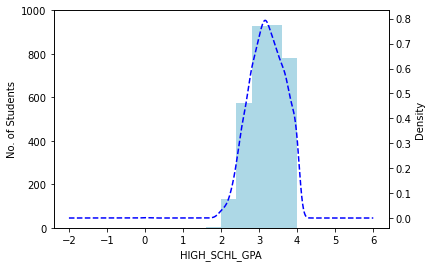

In [43]:
# Analysis of 'HIGH_SCHL_GPA'
ax = data['HIGH_SCHL_GPA'].plot(kind='hist',color='lightblue',ylim=(0,1000))
ax2 = data['HIGH_SCHL_GPA'].plot(kind='density',ls='--',secondary_y=True,color='blue', ax=ax)

ax.set_ylabel('No. of Students')
ax2.set_ylabel('Density')

ax.set_xlabel('HIGH_SCHL_GPA')


In [44]:
print(data['HIGH_SCHL_GPA'].isnull().sum())
print((data['HIGH_SCHL_GPA']==0).sum())

53
1


In [45]:
#'HIGH_SCHL_GPA' is following normal distribution, so imputing 53 missing value with mean=median=mode=3.20
data['HIGH_SCHL_GPA']=np.where((data['HIGH_SCHL_GPA'].isnull()) | (data['HIGH_SCHL_GPA']==0),data['HIGH_SCHL_GPA'].quantile(0.50),data['HIGH_SCHL_GPA'])

In [46]:
stats.spearmanr(data['HIGH_SCHL_GPA'], data['RETURNED_2ND_YR'])

SpearmanrResult(correlation=0.07875814123593529, pvalue=4.269680624388761e-06)

In [47]:
# Chi-square test of independence b/w FATHER_HI_EDU_CD and RETURNED_2ND_YR
crosstab=pd.crosstab(data['FATHER_HI_EDU_CD'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab)   #p value=0.2879,so accept Ho: Variables are independent, so FATHER_HI_EDU_CD can be removed

(3.765373775443228,
 0.28793951299778187,
 3,
 array([[  20.26280323,   76.73719677],
        [ 279.08355795, 1056.91644205],
        [ 273.44339623, 1035.55660377],
        [  47.21024259,  178.78975741]]))

In [48]:
# Chi-square test of independence b/w MOTHER_HI_EDU_CD and RETURNED_2ND_YR
crosstab=pd.crosstab(data['MOTHER_HI_EDU_CD'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab)   #p value=0.3589,so accept Ho: Variables are independent, so MOTHER_HI_EDU_CD can be removed

(3.2204500659946804,
 0.35886885518472544,
 3,
 array([[  14.63414634,   56.36585366],
        [ 252.0783236 ,  970.9216764 ],
        [ 309.17210581, 1190.82789419],
        [  24.11542425,   92.88457575]]))

In [49]:
# Chi-square test of independence b/w DEGREE_GROUP_CD and RETURNED_2ND_YR
crosstab=pd.crosstab(data['DEGREE_GROUP_CD'],data['RETURNED_2ND_YR'])
stats.chi2_contingency(crosstab) # p value=0.912,so Accept Ho: DEGREE_GROUP_CD variables can be removed for further analysis

(0.1851489144554113,
 0.911581334618547,
 2,
 array([[2.55176471e+00, 9.44823529e+00],
        [7.19597647e+02, 2.66440235e+03],
        [8.50588235e-01, 3.14941176e+00]]))

In [50]:
# Spearman's Rank Correlation b/w FIRST_TERM_ATTEMPT_HRS and RETURNED_2ND_YR
correlation_numeric=stats.spearmanr(data['FIRST_TERM_ATTEMPT_HRS'], data['RETURNED_2ND_YR'])
correlation_numeric  #p value = 0.716

SpearmanrResult(correlation=0.006235258332051329, pvalue=0.7162726731937376)

In [51]:
# Spearman's Rank Correlation b/w FIRST_TERM_EARNED_HRS and RETURNED_2ND_YR
correlation_numeric=stats.spearmanr(data['FIRST_TERM_EARNED_HRS'], data['RETURNED_2ND_YR'])
correlation_numeric  #p value =0.0042

SpearmanrResult(correlation=0.04906594135317259, pvalue=0.0042139812240384504)

Text(0.5, 0, 'SECOND_TERM_ATTEMPT_HRS')

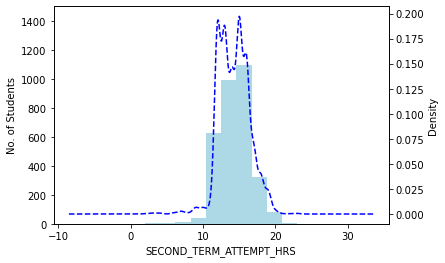

In [52]:
# Analysis of 'SECOND_TERM_ATTEMPT_HRS'
ax = data['SECOND_TERM_ATTEMPT_HRS'].plot(kind='hist',color='lightblue',ylim=(0,1500))
ax2 = data['SECOND_TERM_ATTEMPT_HRS'].plot(kind='density',ls='--',secondary_y=True,color='blue', ax=ax)

ax.set_ylabel('No. of Students')
ax2.set_ylabel('Density')

ax.set_xlabel('SECOND_TERM_ATTEMPT_HRS')


Text(0.5, 0, 'SECOND_TERM_EARNED_HRS')

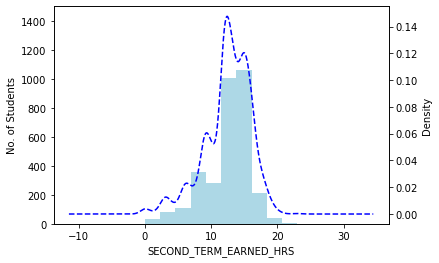

In [53]:
# Analysis of 'SECOND_TERM_EARNED_HRS'
ax = data['SECOND_TERM_EARNED_HRS'].plot(kind='hist',color='lightblue',ylim=(0,1500))
ax2 = data['SECOND_TERM_EARNED_HRS'].plot(kind='density',ls='--',secondary_y=True,color='blue', ax=ax)

ax.set_ylabel('No. of Students')
ax2.set_ylabel('Density')

ax.set_xlabel('SECOND_TERM_EARNED_HRS')

In [54]:
#Imputing missing value of 'SECOND_TERM_ATTEMPT_HRS' and 'SECOND_TERM_EARNED_HRS' with median value of it.
data['SECOND_TERM_ATTEMPT_HRS']=np.where(data['SECOND_TERM_ATTEMPT_HRS'].isnull(),data['SECOND_TERM_ATTEMPT_HRS'].quantile(0.50),data['SECOND_TERM_ATTEMPT_HRS'])
data['SECOND_TERM_EARNED_HRS']=np.where(data['SECOND_TERM_EARNED_HRS'].isnull(),data['SECOND_TERM_EARNED_HRS'].quantile(0.50),data['SECOND_TERM_EARNED_HRS'])    

In [55]:
correlation_numeric=stats.spearmanr(data['SECOND_TERM_ATTEMPT_HRS'], data['RETURNED_2ND_YR'])
correlation_numeric   #p value = 3.158e-05,suggest there is a correlation b/w them and Ho needs to be rejected.

SpearmanrResult(correlation=0.07130881976810938, pvalue=3.1581437019787615e-05)

In [56]:
correlation_numeric=stats.spearmanr(data['SECOND_TERM_EARNED_HRS'], data['RETURNED_2ND_YR'])
correlation_numeric  #p value = 1.964e-06,suggest there is a correlation b/w them and Ho needs to be rejected.

SpearmanrResult(correlation=0.08147725614234659, pvalue=1.9642969718546835e-06)

Text(0, 0.5, 'COST_OF_ATTEND')

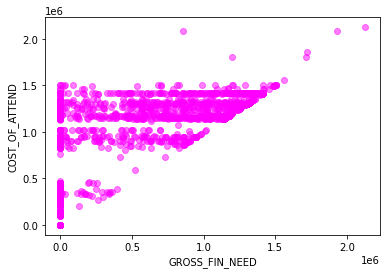

In [57]:
#Analysis of 'GROSS_FIN_NEED' and 'COST_OF_ATTEND'
plt.scatter(x=data['GROSS_FIN_NEED'],y = data['COST_OF_ATTEND'], color = "magenta", alpha = 0.5)
plt.xlabel('GROSS_FIN_NEED')
plt.ylabel('COST_OF_ATTEND')

In [58]:
#There is a correlation between GROSS_FIN_NEED and COST_OF_ATTEND, so it is better to drop either of them in order to avoid multicollinearity
print((data['GROSS_FIN_NEED']==0).sum())  #Checking number of obs. having 0 value
print((data['COST_OF_ATTEND']==0).sum())  #Checking number of obs. having 0 value
# For  GROSS_FIN_NEED, there are 2237 obs having 0 value, so we'll drop this column

2237
1679


In [59]:
correlation_numeric=stats.spearmanr(data['GROSS_FIN_NEED'], data['RETURNED_2ND_YR'])
correlation_numeric

SpearmanrResult(correlation=-0.007336644614540716, pvalue=0.6689098397878983)

In [60]:
correlation_numeric=stats.spearmanr(data['COST_OF_ATTEND'], data['RETURNED_2ND_YR'])
correlation_numeric

SpearmanrResult(correlation=0.0060350964351611166, pvalue=0.725005227535247)

In [61]:
# Analysis of EST_FAM_CONTRIBUTION
print((data['EST_FAM_CONTRIBUTION']!=0).sum())
print((data['EST_FAM_CONTRIBUTION']==0).sum()) # Only 1288 out of 3400 have values for this varaible

1288
2112


In [62]:
# Analysis of 1288 obs with EST_FAM_CONTRIBUTION>0 with RETURNED_2ND_YR
filt=(data['RETURNED_2ND_YR']==0) & (data['EST_FAM_CONTRIBUTION']>0)
df1=data.loc[filt]
filt=(data['RETURNED_2ND_YR']==1) & (data['EST_FAM_CONTRIBUTION']>0)
df2=data.loc[filt]
print(df1.shape)
print(df2.shape)
print(df1['EST_FAM_CONTRIBUTION'].describe())
print(df2['EST_FAM_CONTRIBUTION'].describe())

(267, 29)
(1021, 29)
count    2.670000e+02
mean     8.536969e+05
std      9.762636e+05
min      4.200000e+02
25%      2.335200e+05
50%      5.259000e+05
75%      1.227480e+06
max      5.999940e+06
Name: EST_FAM_CONTRIBUTION, dtype: float64
count    1.021000e+03
mean     9.245922e+05
std      1.079789e+06
min      1.200000e+02
25%      2.059200e+05
50%      5.912400e+05
75%      1.248960e+06
max      5.999940e+06
Name: EST_FAM_CONTRIBUTION, dtype: float64


In [63]:
# Analysis of 2112 obs with EST_FAM_CONTRIBUTION==0 with RETURNED_2ND_YR
filt=(data['RETURNED_2ND_YR']==0) & (data['EST_FAM_CONTRIBUTION']==0)
df1=data.loc[filt]
filt=(data['RETURNED_2ND_YR']==1) & (data['EST_FAM_CONTRIBUTION']==0)
df2=data.loc[filt]
print(df1.shape)
print(df2.shape)

(456, 29)
(1656, 29)


In [64]:
# Ratio of returning students with and without EST_FAM_CONTRIBUTION 
print('Ratio of returning students with EST_FAM_CONTRIBUTION'+str(1021/1288))
print('Ratio of returning students without EST_FAM_CONTRIBUTION'+str(1656/2112))
# Ratio seems to be immune with EST_FAM_CONTRIBUTION, so this variable can be removed

Ratio of returning students with EST_FAM_CONTRIBUTION0.7927018633540373
Ratio of returning students without EST_FAM_CONTRIBUTION0.7840909090909091


In [65]:
correlation_numeric=stats.spearmanr(data['EST_FAM_CONTRIBUTION'], data['RETURNED_2ND_YR'])
correlation_numeric  #p value = 0.5214,suggest there is a correlation b/w them because of chance factor and Ho needs to be accepted.Hence this variable can be removed

SpearmanrResult(correlation=0.010999195839695573, pvalue=0.5214308327482271)

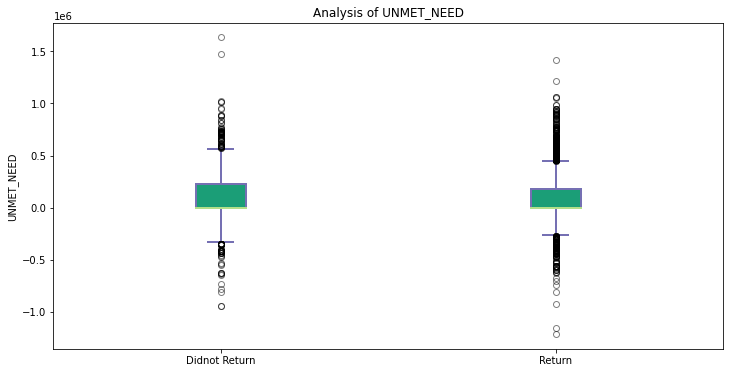

In [66]:
#Analysis of UNMET_NEED variable
filt=(data['RETURNED_2ND_YR']==0)
df1=data.loc[filt]
filt=(data['RETURNED_2ND_YR']==1) 
df2=data.loc[filt]

data_to_plot=[df1['UNMET_NEED'],df2['UNMET_NEED']]

fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,patch_artist=True)

ax.set_xticklabels(['Didnot Return', 'Return'])
plt.title('Analysis of UNMET_NEED')
plt.ylabel('UNMET_NEED')

for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

In [67]:
#There seems to be no difference between returning and non-returning students for UNMET_NEED, so converting it into categorical vriable.
data['UNMET_NEED_FLAG']=np.where(data['UNMET_NEED']>0,'Aid Required','No Aid Required')

In [68]:
#Analysis of COST_OF_ATTEND with RETURNED_2ND_YR 
print((data['COST_OF_ATTEND']!=0).sum())
print((data['COST_OF_ATTEND']==0).sum()) #approx 50% of the data is having zero value

1721
1679


(376, 30)
(1345, 30)


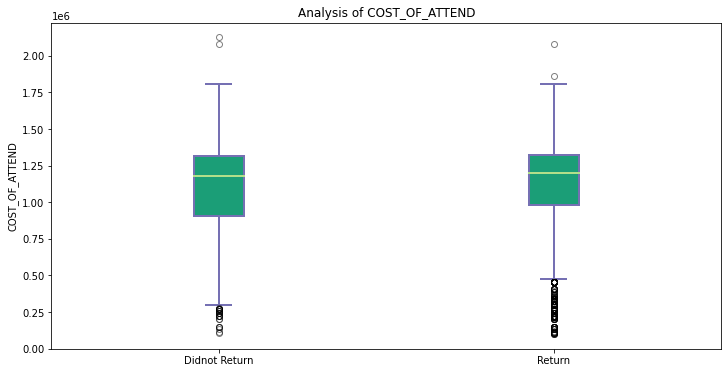

In [69]:
filt=(data['RETURNED_2ND_YR']==0) & (data['COST_OF_ATTEND'] >0)
df1=data.loc[filt]
filt=(data['RETURNED_2ND_YR']==1) & (data['COST_OF_ATTEND'] >0)
df2=data.loc[filt]
print(df1.shape)
print(df2.shape)

data_to_plot=[df1['COST_OF_ATTEND'],df2['COST_OF_ATTEND']]

fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot,patch_artist=True)

ax.set_xticklabels(['Didnot Return', 'Return'])
plt.title('Analysis of COST_OF_ATTEND')
plt.ylabel('COST_OF_ATTEND')

for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

In [70]:
#There seems to be no affect of COST_OF_ATTEND on returning and non-returning students.
#Further analysis of COST_OF_ATTEND is required with major STREAMS for returning and non-returning students,in order to check its correlation and doing zero value imputation.
filt=df1['STREAM'] =='Art,Music and Theatre'
df_A_0=df1.loc[filt]
filt=df1['STREAM'] =='Undeclared'
df_U_0=df1.loc[filt]
filt=df1['STREAM'] =='Pure Science'
df_P_0=df1.loc[filt]
filt=df1['STREAM'] =='Nursing'
df_N_0=df1.loc[filt]
filt=df1['STREAM'] =='Management and Business Studies'
df_MB_0=df1.loc[filt]

filt=df2['STREAM'] =='Art,Music and Theatre'
df_A_1=df2.loc[filt]
filt=df2['STREAM'] =='Undeclared'
df_U_1=df2.loc[filt]
filt=df2['STREAM'] =='Pure Science'
df_P_1=df2.loc[filt]
filt=df2['STREAM'] =='Nursing'
df_N_1=df2.loc[filt]
filt=df2['STREAM'] =='Management and Business Studies'
df_MB_1=df2.loc[filt]

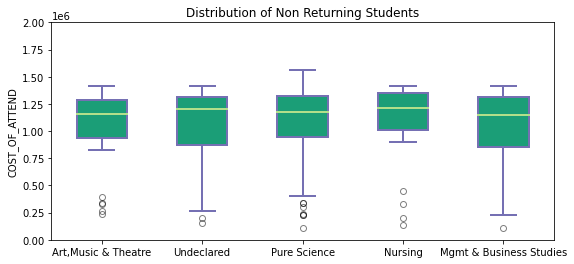

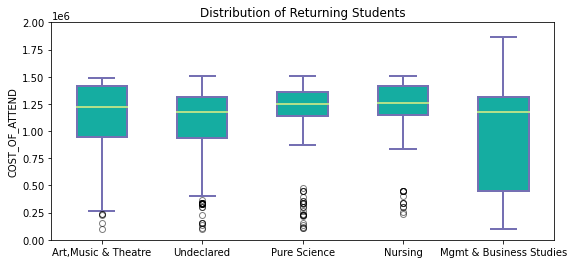

In [71]:
data_to_plot_0=[df_A_0['COST_OF_ATTEND'],df_U_0['COST_OF_ATTEND'],df_P_0['COST_OF_ATTEND'],df_N_0['COST_OF_ATTEND'],df_MB_0['COST_OF_ATTEND']]

fig = plt.figure(0, figsize=(9, 4))
ax = fig.add_subplot(111)
bp_0 = ax.boxplot(data_to_plot_0,patch_artist=True)
plt.title('Distribution of Non Returning Students')
plt.ylim(000000,2000000)
plt.ylabel('COST_OF_ATTEND')
ax.set_xticklabels(['Art,Music & Theatre', 'Undeclared','Pure Science','Nursing','Mgmt & Business Studies'])

for box in bp_0['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

for whisker in bp_0['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp_0['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp_0['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp_0['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

data_to_plot_1=[df_A_1['COST_OF_ATTEND'],df_U_1['COST_OF_ATTEND'],df_P_1['COST_OF_ATTEND'],df_N_1['COST_OF_ATTEND'],df_MB_1['COST_OF_ATTEND']]

fig = plt.figure(1, figsize=(9, 4))
ax = fig.add_subplot(111)
bp_1= ax.boxplot(data_to_plot_1,patch_artist=True)
plt.title('Distribution of Returning Students')
plt.ylim(000000,2000000)
plt.ylabel('COST_OF_ATTEND')
ax.set_xticklabels(['Art,Music & Theatre', 'Undeclared','Pure Science','Nursing','Mgmt & Business Studies'])

for box in bp_1['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#15ada1' )

for whisker in bp_1['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp_1['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp_1['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp_1['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

In [72]:
#From the above boxplot, it is very clear that different STREAMS have different COST_OF_ATTEND, 
#so it would be better idea if zero values will be replaced with corresponding STREAM and SESSION combination.
cols=['STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','SESSION','STREAM','COST_OF_ATTEND']
rows=data['COST_OF_ATTEND']>0
data_non_zero=data.loc[rows,cols]
data_stat=data_non_zero.groupby(['STREAM','SESSION'])['COST_OF_ATTEND'].quantile([0.25,0.50,0.75])
data_stat

STREAM                 SESSION        
Art,Music and Theatre  2005-2006  0.25    1136460.0
                                  0.50    1146420.0
                                  0.75    1146420.0
                       2006-2007  0.25     437490.0
                                  0.50    1176420.0
                                            ...    
Undeclared             2009-2010  0.50    1324500.0
                                  0.75    1417740.0
                       2010-2011  0.25     150540.0
                                  0.50     150540.0
                                  0.75     150540.0
Name: COST_OF_ATTEND, Length: 183, dtype: float64

In [73]:
data_stat=data_stat.to_frame()
data_stat.head()

COST_OF_ATTEND
STREAM                SESSION                       
Art,Music and Theatre 2005-2006 0.25       1136460.0
                                0.50       1146420.0
                                0.75       1146420.0
                      2006-2007 0.25        437490.0
                                0.50       1176420.0

In [74]:
data_stat=data_stat.unstack(level=2)
data_stat

COST_OF_ATTEND                      
                                          0.25       0.50       0.75
STREAM                SESSION                                       
Art,Music and Theatre 2005-2006      1136460.0  1146420.0  1146420.0
                      2006-2007       437490.0  1176420.0  1176420.0
                      2007-2008       902760.0  1201500.0  1245480.0
                      2008-2009       945840.0  1296900.0  1306020.0
                      2009-2010      1098420.0  1418100.0  1418100.0
...                                        ...        ...        ...
Undeclared            2006-2007      1171380.0  1176420.0  1176420.0
                      2007-2008       869760.0  1189920.0  1233900.0
                      2008-2009       945840.0  1264860.0  1306020.0
                      2009-2010      1025700.0  1324500.0  1417740.0
                      2010-2011       150540.0   150540.0   150540.0

[61 rows x 3 columns]

In [75]:
data_stat_2010_2011=data_non_zero.groupby('STREAM')['COST_OF_ATTEND'].quantile([0.25,0.50,0.75])

In [76]:
data_stat_2010_2011=data_stat_2010_2011.unstack(level=1)
data_stat_2010_2011

,0.25,0.50,0.75
STREAM,,,
"Art,Music and Theatre",945840.0,1195710.0,1410180.0
CS and IT,949560.0,1189920.0,1324500.0
Education,1146420.0,1255740.0,1330035.0
Engineering and Applied Science,1146420.0,1211910.0,1308660.0
Health and Physical Education,955500.0,1255740.0,1362345.0
Humanities,1025700.0,1176420.0,1324500.0
Languages,945840.0,1201500.0,1324500.0
Management and Business Studies,588120.0,1171380.0,1316580.0
Nursing,1146420.0,1250610.0,1405155.0


In [77]:
data_stat.loc[('CS and IT','2010-2011'),('COST_OF_ATTEND', 0.25)]=data_stat_2010_2011.loc['CS and IT',0.25]
data_stat.loc[('CS and IT','2010-2011'),('COST_OF_ATTEND', 0.50)]=data_stat_2010_2011.loc['CS and IT',0.50]
data_stat.loc[('CS and IT','2010-2011'),('COST_OF_ATTEND', 0.75)]=data_stat_2010_2011.loc['CS and IT',0.75]


data_stat.loc[('Education','2010-2011'),('COST_OF_ATTEND', 0.25)]=data_stat_2010_2011.loc['Education',0.25]
data_stat.loc[('Education','2010-2011'),('COST_OF_ATTEND', 0.50)]=data_stat_2010_2011.loc['Education',0.50]
data_stat.loc[('Education','2010-2011'),('COST_OF_ATTEND', 0.75)]=data_stat_2010_2011.loc['Education',0.75]

data_stat.loc[('Engineering and Applied Science','2010-2011'),('COST_OF_ATTEND', 0.25)]=data_stat_2010_2011.loc['Engineering and Applied Science',0.25]
data_stat.loc[('Engineering and Applied Science','2010-2011'),('COST_OF_ATTEND', 0.50)]=data_stat_2010_2011.loc['Engineering and Applied Science',0.50]
data_stat.loc[('Engineering and Applied Science','2010-2011'),('COST_OF_ATTEND', 0.75)]=data_stat_2010_2011.loc['Engineering and Applied Science',0.75]

data_stat.loc[('Languages','2010-2011'),('COST_OF_ATTEND', 0.25)]=data_stat_2010_2011.loc['Languages',0.25]
data_stat.loc[('Languages','2010-2011'),('COST_OF_ATTEND', 0.50)]=data_stat_2010_2011.loc['Languages',0.50]
data_stat.loc[('Languages','2010-2011'),('COST_OF_ATTEND', 0.75)]=data_stat_2010_2011.loc['Languages',0.75]

data_stat.loc[('Nursing','2010-2011'),('COST_OF_ATTEND', 0.25)]=data_stat_2010_2011.loc['Nursing',0.25]
data_stat.loc[('Nursing','2010-2011'),('COST_OF_ATTEND', 0.50)]=data_stat_2010_2011.loc['Nursing',0.50]
data_stat.loc[('Nursing','2010-2011'),('COST_OF_ATTEND', 0.75)]=data_stat_2010_2011.loc['Nursing',0.75]

In [78]:
data_stat.loc[['CS and IT','Education','Engineering and Applied Science','Languages','Nursing'],:]

COST_OF_ATTEND                      
                                                    0.25       0.50       0.75
STREAM                          SESSION                                       
CS and IT                       2005-2006       336960.0   831720.0  1146420.0
                                2006-2007      1171380.0  1173900.0  1184565.0
                                2007-2008       906810.0  1195710.0  1209600.0
                                2008-2009       945840.0  1264860.0  1301460.0
                                2009-2010      1171140.0  1417380.0  1418100.0
Education                       2005-2006       832710.0  1146420.0  1150335.0
                                2006-2007      1176420.0  1187280.0  1489080.0
                                2007-2008       851790.0  1189920.0  1242585.0
                                2008-2009      1264860.0  1306020.0  1306020.0
                                2009-2010      1320540.0  1324500.0  1417380.0
Engineering and Applied Science 2005-2006      1144200.0  1146420.0  1146420.0
                                2006-2007      1176420.0  1176420.0  1176420.0
                                2007-2008      1200915.0  1233900.0  1242585.0
                                2008-2009      1100790.0  1264860.0  1306020.0
                                2009-2010      1008150.0  1316580.0  1324500.0
Languages                       2005-2006      1138980.0  1146420.0  1151640.0
                                2006-2007       232380.0   299160.0  1014450.0
                                2007-2008       902760.0  1052130.0  1201500.0
                                2008-2009       945840.0   945840.0  1255740.0
                                2009-2010      1322520.0  1410180.0  1418100.0
Nursing                         2005-2006      1144200.0  1146420.0  1146420.0
                                2006-2007      1176420.0  1176420.0  1187280.0
                                2007-2008       974550.0  1217700.0  1245480.0
                                2008-2009      1255740.0  1296900.0  1346640.0
                                2009-2010      1316580.0  1409460.0  1418100.0
CS and IT                       2010-2011       949560.0  1189920.0  1324500.0
Education                       2010-2011      1146420.0  1255740.0  1330035.0
Engineering and Applied Science 2010-2011      1146420.0  1211910.0  1308660.0
Languages                       2010-2011       945840.0  1201500.0  1324500.0
Nursing                         2010-2011      1146420.0  1250610.0  1405155.0

In [79]:
#Outlier treatment (replaced with upper or lower quartile value) and 
#zero values treatment(replaced with median value for corresponding SESSION & STREAM combination)
for i in range(len(data)):
    a=data.loc[i,'STREAM']
    b=data.loc[i,'SESSION']
    
    if (data.loc[i,'COST_OF_ATTEND']==0):
        if (a in data_stat.index.levels[0]) and (b in data_stat.index.levels[1]):
            data.loc[i,'FEES'] = data_stat.loc[(a,b),('COST_OF_ATTEND', 0.5)]
        else:
            print('Does not present')
    else:
        print('COST is non-zero')
        IQR= data_stat.loc[(a,b),('COST_OF_ATTEND', 0.75)]- data_stat.loc[(a,b),('COST_OF_ATTEND', 0.25)]
        lower_cap=data_stat.loc[(a,b),('COST_OF_ATTEND', 0.25)] - (IQR*1.5)
        upper_cap=data_stat.loc[(a,b),('COST_OF_ATTEND', 0.75)] + (IQR*1.5)
        print(i,a,b)
        print(lower_cap, upper_cap)
        if (data.loc[i,'COST_OF_ATTEND'] > upper_cap):
            data.loc[i,'FEES']=upper_cap
            print('Upper_outlier, fees changed to upper_cap')
        elif(data.loc[i,'COST_OF_ATTEND'] < lower_cap):
            data.loc[i,'FEES']=lower_cap
            print('lower_outlier, fees changed to lower_cap')
        else:
            print('Fees is not outlier and remained same')
            data.loc[i,'FEES']=data.loc[i,'COST_OF_ATTEND']
        

print('E-o-I')  

COST is non-zero
1 Undeclared 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
4 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
10 Humanities 2007-2008
346297.5 1824397.5
Fees is not outlier and remained same
COST is non-zero
11 Undeclared 2007-2008
323550.0 1780110.0
Fees is not outlier and remained same
COST is non-zero
13 Humanities 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
17 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
19 Nursing 2005-2006
1140870.0 1149750.0
lower_outlier, fees changed to lower_cap
COST is non-zero
20 Nursing 2006-2007
1160130.0 1203570.0
Fees is not outlier and remained same
COST is non-zero
22 Nursing 2007-2008
568155.0 1651875.0
Fees is not outlier and remained same
COST is non-zero
24 Nursing 2008-2009
1119390.0 1482990.0
lower_outlier, fees changed to lower_cap
COST is non

COST is non-zero
253 Humanities 2005-2006
1140870.0 1149750.0
Fees is not outlier and remained same
COST is non-zero
254 Undeclared 2005-2006
-885060.0 2373660.0
Fees is not outlier and remained same
COST is non-zero
255 Humanities 2007-2008
346297.5 1824397.5
Fees is not outlier and remained same
COST is non-zero
261 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
262 Humanities 2007-2008
346297.5 1824397.5
lower_outlier, fees changed to lower_cap
COST is non-zero
263 Engineering and Applied Science 2007-2008
1138410.0 1305090.0
Fees is not outlier and remained same
COST is non-zero
271 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
273 Engineering and Applied Science 2008-2009
792945.0 1613865.0
Fees is not outlier and remained same
COST is non-zero
278 Management and Business Studies 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
279 Pure Sci

440 Art,Music and Theatre 2005-2006
1121520.0 1161360.0
Fees is not outlier and remained same
COST is non-zero
441 Humanities 2006-2007
1163820.0 1183980.0
Fees is not outlier and remained same
COST is non-zero
445 Health and Physical Education 2006-2007
-490597.5 2189662.5
Fees is not outlier and remained same
COST is non-zero
446 Education 2007-2008
265597.5 1828777.5
Fees is not outlier and remained same
COST is non-zero
449 Pure Science 2008-2009
486045.0 1798005.0
Fees is not outlier and remained same
COST is non-zero
450 Management and Business Studies 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
451 Nursing 2009-2010
1164300.0 1570380.0
Fees is not outlier and remained same
COST is non-zero
453 Education 2007-2008
265597.5 1828777.5
Fees is not outlier and remained same
COST is non-zero
454 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
456 Nursing 2008-2009
1119390.0 1482990.0
Fees is not 

646 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
648 Undeclared 2008-2009
405570.0 1846290.0
lower_outlier, fees changed to lower_cap
COST is non-zero
649 Art,Music and Theatre 2006-2007
-670905.0 2284815.0
Fees is not outlier and remained same
COST is non-zero
650 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
651 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
653 Humanities 2005-2006
1140870.0 1149750.0
Fees is not outlier and remained same
COST is non-zero
654 Pure Science 2007-2008
388680.0 1759560.0
Fees is not outlier and remained same
COST is non-zero
657 Engineering and Applied Science 2009-2010
533625.0 1799025.0
Fees is not outlier and remained same
COST is non-zero
658 Art,Music and Theatre 2009-2010
618900.0 1897620.0
lower_outlier, fees changed to lower_cap
COST is non-zero
661 Art,Music and Theatre 2009-201

830 CS and IT 2008-2009
412410.0 1834890.0
Fees is not outlier and remained same
COST is non-zero
831 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
832 Art,Music and Theatre 2009-2010
618900.0 1897620.0
lower_outlier, fees changed to lower_cap
COST is non-zero
833 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
834 CS and IT 2009-2010
800700.0 1788540.0
Fees is not outlier and remained same
COST is non-zero
835 Education 2009-2010
1175280.0 1562640.0
Fees is not outlier and remained same
COST is non-zero
839 Health and Physical Education 2010-2011
29700.0 513060.0
Fees is not outlier and remained same
COST is non-zero
840 Health and Physical Education 2005-2006
1127820.0 1157580.0
Fees is not outlier and remained same
COST is non-zero
841 Health and Physical Education 2006-2007
-490597.5 2189662.5
Fees is not outlier and remained same
COST is non-zero
844 Management and Business Studies 2009

1061 Management and Business Studies 2007-2008
65850.0 1934730.0
Fees is not outlier and remained same
COST is non-zero
1063 Humanities 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
1066 Management and Business Studies 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1068 Undeclared 2006-2007
1163820.0 1183980.0
Fees is not outlier and remained same
COST is non-zero
1070 Management and Business Studies 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1072 Undeclared 2006-2007
1163820.0 1183980.0
Fees is not outlier and remained same
COST is non-zero
1073 Art,Music and Theatre 2007-2008
388680.0 1759560.0
lower_outlier, fees changed to lower_cap
COST is non-zero
1075 Undeclared 2007-2008
323550.0 1780110.0
Fees is not outlier and remained same
COST is non-zero
1077 Humanities 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
1078 Nursing 2009-2010

COST is non-zero
1242 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1243 Art,Music and Theatre 2007-2008
388680.0 1759560.0
Fees is not outlier and remained same
COST is non-zero
1245 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1247 Undeclared 2007-2008
323550.0 1780110.0
Fees is not outlier and remained same
COST is non-zero
1250 Languages 2009-2010
1179150.0 1561470.0
Fees is not outlier and remained same
COST is non-zero
1251 Management and Business Studies 2009-2010
437100.0 2006700.0
lower_outlier, fees changed to lower_cap
COST is non-zero
1253 Nursing 2009-2010
1164300.0 1570380.0
Fees is not outlier and remained same
COST is non-zero
1256 Education 2005-2006
356272.5 1626772.5
lower_outlier, fees changed to lower_cap
COST is non-zero
1260 Pure Science 2007-2008
388680.0 1759560.0
lower_outlier, fees changed to lower_cap
COST is non-zero
1261 Management and Business Studies 2008-2

COST is non-zero
1404 Management and Business Studies 2010-2011
-75270.0 526890.0
Fees is not outlier and remained same
COST is non-zero
1408 Undeclared 2005-2006
-885060.0 2373660.0
Fees is not outlier and remained same
COST is non-zero
1411 Nursing 2005-2006
1140870.0 1149750.0
Fees is not outlier and remained same
COST is non-zero
1412 Humanities 2008-2009
405570.0 1846290.0
lower_outlier, fees changed to lower_cap
COST is non-zero
1414 Education 2009-2010
1175280.0 1562640.0
Fees is not outlier and remained same
COST is non-zero
1416 Undeclared 2006-2007
1163820.0 1183980.0
Upper_outlier, fees changed to upper_cap
COST is non-zero
1417 Humanities 2007-2008
346297.5 1824397.5
Fees is not outlier and remained same
COST is non-zero
1418 Undeclared 2005-2006
-885060.0 2373660.0
Fees is not outlier and remained same
COST is non-zero
1419 Pure Science 2007-2008
388680.0 1759560.0
Fees is not outlier and remained same
COST is non-zero
1421 Management and Business Studies 2006-2007
1136670

1588 Education 2008-2009
1203120.0 1367760.0
Upper_outlier, fees changed to upper_cap
COST is non-zero
1589 Pure Science 2008-2009
486045.0 1798005.0
Fees is not outlier and remained same
COST is non-zero
1590 Humanities 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
1591 Art,Music and Theatre 2009-2010
618900.0 1897620.0
Fees is not outlier and remained same
COST is non-zero
1592 Management and Business Studies 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1595 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1597 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1601 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
1602 Management and Business Studies 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
1603 Management and Business Studies 2005-

1767 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
1769 Art,Music and Theatre 2009-2010
618900.0 1897620.0
Fees is not outlier and remained same
COST is non-zero
1770 Pure Science 2005-2006
551707.5 1503247.5
Fees is not outlier and remained same
COST is non-zero
1771 Health and Physical Education 2005-2006
1127820.0 1157580.0
Fees is not outlier and remained same
COST is non-zero
1773 Humanities 2006-2007
1163820.0 1183980.0
Fees is not outlier and remained same
COST is non-zero
1775 Management and Business Studies 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
1776 Art,Music and Theatre 2010-2011
112785.0 450585.0
Fees is not outlier and remained same
COST is non-zero
1781 Engineering and Applied Science 2007-2008
1138410.0 1305090.0
Fees is not outlier and remained same
COST is non-zero
1784 Education 2005-2006
356272.5 1626772.5
lower_outlier, fees changed to lower_cap
COST is non-zero
1785 Nursin

1934 Management and Business Studies 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
1937 Nursing 2007-2008
568155.0 1651875.0
Fees is not outlier and remained same
COST is non-zero
1939 Nursing 2009-2010
1164300.0 1570380.0
lower_outlier, fees changed to lower_cap
COST is non-zero
1940 Nursing 2009-2010
1164300.0 1570380.0
Fees is not outlier and remained same
COST is non-zero
1943 Nursing 2009-2010
1164300.0 1570380.0
Fees is not outlier and remained same
COST is non-zero
1944 Humanities 2005-2006
1140870.0 1149750.0
Fees is not outlier and remained same
COST is non-zero
1945 Nursing 2006-2007
1160130.0 1203570.0
Fees is not outlier and remained same
COST is non-zero
1946 Management and Business Studies 2007-2008
65850.0 1934730.0
Fees is not outlier and remained same
COST is non-zero
1948 Education 2009-2010
1175280.0 1562640.0
Fees is not outlier and remained same
COST is non-zero
1951 Management and Business Studies 2006-2007
1136670.0 1200270.0

2101 Undeclared 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
2102 Education 2009-2010
1175280.0 1562640.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2103 Languages 2009-2010
1179150.0 1561470.0
Fees is not outlier and remained same
COST is non-zero
2104 Nursing 2009-2010
1164300.0 1570380.0
Fees is not outlier and remained same
COST is non-zero
2105 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
2109 CS and IT 2007-2008
452625.0 1663785.0
Fees is not outlier and remained same
COST is non-zero
2111 Art,Music and Theatre 2009-2010
618900.0 1897620.0
Fees is not outlier and remained same
COST is non-zero
2113 Management and Business Studies 2010-2011
-75270.0 526890.0
Fees is not outlier and remained same
COST is non-zero
2114 Education 2008-2009
1203120.0 1367760.0
Fees is not outlier and remained same
COST is non-zero
2117 Pure Science 2009-2010
1184100.0 1558500.0
lower_outlier, fee

2282 Education 2005-2006
356272.5 1626772.5
Fees is not outlier and remained same
COST is non-zero
2284 Engineering and Applied Science 2005-2006
1140870.0 1149750.0
Fees is not outlier and remained same
COST is non-zero
2285 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
2286 Management and Business Studies 2009-2010
437100.0 2006700.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2288 Engineering and Applied Science 2008-2009
792945.0 1613865.0
Fees is not outlier and remained same
COST is non-zero
2289 Management and Business Studies 2008-2009
405570.0 1846290.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2290 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
2291 Undeclared 2005-2006
-885060.0 2373660.0
Fees is not outlier and remained same
COST is non-zero
2292 Humanities 2007-2008
346297.5 1824397.5
lower_outlier, fees changed to lower_cap
COST is non-

2443 Management and Business Studies 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
2445 Undeclared 2007-2008
323550.0 1780110.0
Fees is not outlier and remained same
COST is non-zero
2447 Pure Science 2008-2009
486045.0 1798005.0
Fees is not outlier and remained same
COST is non-zero
2448 Management and Business Studies 2007-2008
65850.0 1934730.0
Fees is not outlier and remained same
COST is non-zero
2452 Management and Business Studies 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
2453 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
2456 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
2457 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
2460 Nursing 2009-2010
1164300.0 1570380.0
Fees is not outlier and remained same
COST is non-zero
2463 Undeclared 2006-2007
116382

2708 Management and Business Studies 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
2709 Undeclared 2005-2006
-885060.0 2373660.0
Fees is not outlier and remained same
COST is non-zero
2710 Education 2005-2006
356272.5 1626772.5
Fees is not outlier and remained same
COST is non-zero
2712 Management and Business Studies 2006-2007
1136670.0 1200270.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2713 Art,Music and Theatre 2009-2010
618900.0 1897620.0
Fees is not outlier and remained same
COST is non-zero
2715 Undeclared 2007-2008
323550.0 1780110.0
Fees is not outlier and remained same
COST is non-zero
2717 Pure Science 2009-2010
1184100.0 1558500.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2720 CS and IT 2009-2010
800700.0 1788540.0
Fees is not outlier and remained same
COST is non-zero
2722 Humanities 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
2724 Humanities 2009-2010
437100.0 200

Fees is not outlier and remained same
COST is non-zero
2901 Nursing 2007-2008
568155.0 1651875.0
Fees is not outlier and remained same
COST is non-zero
2902 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
2903 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
2905 Education 2007-2008
265597.5 1828777.5
lower_outlier, fees changed to lower_cap
COST is non-zero
2907 Undeclared 2008-2009
405570.0 1846290.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2909 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
2910 Humanities 2006-2007
1163820.0 1183980.0
Fees is not outlier and remained same
COST is non-zero
2916 Nursing 2008-2009
1119390.0 1482990.0
lower_outlier, fees changed to lower_cap
COST is non-zero
2919 Health and Physical Education 2006-2007
-490597.5 2189662.5
Fees is not outlier and remained same
COST is non-zero
2923 Management

COST is non-zero
3111 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
3112 Art,Music and Theatre 2009-2010
618900.0 1897620.0
Fees is not outlier and remained same
COST is non-zero
3113 Art,Music and Theatre 2010-2011
112785.0 450585.0
Fees is not outlier and remained same
COST is non-zero
3114 Art,Music and Theatre 2005-2006
1121520.0 1161360.0
lower_outlier, fees changed to lower_cap
COST is non-zero
3115 Art,Music and Theatre 2006-2007
-670905.0 2284815.0
Fees is not outlier and remained same
COST is non-zero
3118 Art,Music and Theatre 2009-2010
618900.0 1897620.0
Fees is not outlier and remained same
COST is non-zero
3120 Management and Business Studies 2006-2007
1136670.0 1200270.0
Fees is not outlier and remained same
COST is non-zero
3123 Pure Science 2006-2007
599955.0 1539675.0
Fees is not outlier and remained same
COST is non-zero
3124 Art,Music and Theatre 2008-2009
405570.0 1846290.0
Fees is not outlier and remained 

3290 Management and Business Studies 2008-2009
405570.0 1846290.0
Fees is not outlier and remained same
COST is non-zero
3291 Humanities 2009-2010
437100.0 2006700.0
Fees is not outlier and remained same
COST is non-zero
3292 Engineering and Applied Science 2009-2010
533625.0 1799025.0
Fees is not outlier and remained same
COST is non-zero
3293 Undeclared 2009-2010
437640.0 2005800.0
Fees is not outlier and remained same
COST is non-zero
3296 Management and Business Studies 2005-2006
233430.0 1698390.0
Fees is not outlier and remained same
COST is non-zero
3298 Nursing 2008-2009
1119390.0 1482990.0
Fees is not outlier and remained same
COST is non-zero
3299 Pure Science 2009-2010
1184100.0 1558500.0
Fees is not outlier and remained same
COST is non-zero
3300 Undeclared 2005-2006
-885060.0 2373660.0
Fees is not outlier and remained same
COST is non-zero
3301 Art,Music and Theatre 2006-2007
-670905.0 2284815.0
Fees is not outlier and remained same
COST is non-zero
3302 Education 2007-200

In [ ]:
#Columns that can be removed are -
#'EST_FAM_CONTRIBUTION' - because of low availability of data
#'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD' - Chi square test of independence
#'GROSS_FIN_NEED' - High correlation with 'COST_OF_ATTEND'

In [80]:
data.drop(['EST_FAM_CONTRIBUTION','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD','GROSS_FIN_NEED'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STDNT_AGE                3400 non-null   int64  
 1   STDNT_GENDER             3400 non-null   object 
 2   STDNT_BACKGROUND         3400 non-null   object 
 3   IN_STATE_FLAG            3400 non-null   object 
 4   INTERNATIONAL_STS        3400 non-null   object 
 5   STDNT_MAJOR              3400 non-null   object 
 6   FIRST_TERM               3400 non-null   object 
 7   CORE_COURSE_GRADE_1_F    3400 non-null   object 
 8   CORE_COURSE_GRADE_2_F    3400 non-null   object 
 9   SECOND_TERM              3400 non-null   object 
 10  CORE_COURSE_GRADE_1_S    3400 non-null   object 
 11  CORE_COURSE_GRADE_2_S    3400 non-null   object 
 12  HOUSING_STS              3400 non-null   object 
 13  RETURNED_2ND_YR          3400 non-null   int64  
 14  DISTANCE_FROM_HOME      

In [81]:
#Creating 'NON_RETURNED_2ND_YR' flag by flipping 'RETURNED_2ND_YR' flag
data['NON_RETURNED_2ND_YR']=np.where(data['RETURNED_2ND_YR']==0,1,0)
data.loc[:,['RETURNED_2ND_YR','NON_RETURNED_2ND_YR']].head()

,RETURNED_2ND_YR,NON_RETURNED_2ND_YR
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STDNT_AGE                3400 non-null   int64  
 1   STDNT_GENDER             3400 non-null   object 
 2   STDNT_BACKGROUND         3400 non-null   object 
 3   IN_STATE_FLAG            3400 non-null   object 
 4   INTERNATIONAL_STS        3400 non-null   object 
 5   STDNT_MAJOR              3400 non-null   object 
 6   FIRST_TERM               3400 non-null   object 
 7   CORE_COURSE_GRADE_1_F    3400 non-null   object 
 8   CORE_COURSE_GRADE_2_F    3400 non-null   object 
 9   SECOND_TERM              3400 non-null   object 
 10  CORE_COURSE_GRADE_1_S    3400 non-null   object 
 11  CORE_COURSE_GRADE_2_S    3400 non-null   object 
 12  HOUSING_STS              3400 non-null   object 
 13  RETURNED_2ND_YR          3400 non-null   int64  
 14  DISTANCE_FROM_HOME      

In [83]:
data_model=data.iloc[:,[0,1,2,3,4,7,8,10,11,12,14,15,16,17,18,19,22,23,24,25,26]]
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STDNT_AGE                3400 non-null   int64  
 1   STDNT_GENDER             3400 non-null   object 
 2   STDNT_BACKGROUND         3400 non-null   object 
 3   IN_STATE_FLAG            3400 non-null   object 
 4   INTERNATIONAL_STS        3400 non-null   object 
 5   CORE_COURSE_GRADE_1_F    3400 non-null   object 
 6   CORE_COURSE_GRADE_2_F    3400 non-null   object 
 7   CORE_COURSE_GRADE_1_S    3400 non-null   object 
 8   CORE_COURSE_GRADE_2_S    3400 non-null   object 
 9   HOUSING_STS              3400 non-null   object 
 10  DISTANCE_FROM_HOME       3400 non-null   float64
 11  HIGH_SCHL_GPA            3400 non-null   float64
 12  FIRST_TERM_ATTEMPT_HRS   3400 non-null   int64  
 13  FIRST_TERM_EARNED_HRS    3400 non-null   int64  
 14  SECOND_TERM_ATTEMPT_HRS 

In [84]:
x=data_model.iloc[:,0:20]
y=data_model.iloc[:,-1]

In [85]:
X=pd.get_dummies(x)

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.96956039e-02 2.80874062e-02 4.23539917e-02 3.56753128e-02
 3.89331877e-02 3.78366011e-02 3.99293361e-02 3.72037441e-02
 1.57587078e-02 1.55101968e-02 1.48184291e-02 4.05064332e-03
 1.30697721e-02 6.88508156e-03 2.58585594e-03 3.22953847e-03
 8.32052206e-03 8.46686956e-03 2.00201024e-03 2.15856647e-03
 6.12760055e-03 1.12204689e-02 1.40324809e-02 1.21098609e-02
 1.16293510e-02 2.77164899e-03 4.76893028e-03 1.01030617e-02
 1.41825407e-02 1.20022458e-02 7.72315334e-03 6.75085666e-03
 2.66570353e-04 2.50768509e-05 9.62986251e-03 1.69045897e-02
 1.54552881e-02 1.21493120e-02 1.08420297e-02 2.81463133e-03
 2.12058977e-03 8.92050663e-02 9.61549462e-03 1.49148688e-02
 1.27874251e-02 7.53790959e-03 1.01187420e-02 3.55204747e-02
 1.35290475e-02 1.44577812e-02 1.35586138e-02 1.37740093e-02
 1.35365909e-02 1.46488017e-02 1.45851336e-02 1.29612481e-02
 1.69497202e-02 5.94169006e-03 7.66119192e-03 5.65032866e-03
 7.56968825e-03 1.40455962e-02 4.88140469e-03 1.59361217e-02
 1.31175513e-02 1.446902

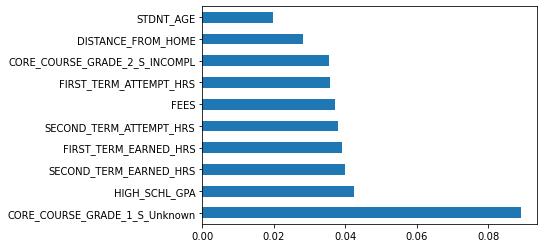

In [87]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [89]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                            Specs          Score
7                            FEES  367105.545116
1              DISTANCE_FROM_HOME     914.208889
41  CORE_COURSE_GRADE_1_S_Unknown     519.694009
47  CORE_COURSE_GRADE_2_S_INCOMPL     222.670176
35        CORE_COURSE_GRADE_1_S_B      53.433970
24        CORE_COURSE_GRADE_1_F_F      51.233541
46        CORE_COURSE_GRADE_2_S_F      49.016022
31        CORE_COURSE_GRADE_2_F_F      46.197560
43        CORE_COURSE_GRADE_2_S_B      43.986690
6          SECOND_TERM_EARNED_HRS      35.336983
21        CORE_COURSE_GRADE_1_F_B      31.190943
42        CORE_COURSE_GRADE_2_S_A      28.979152
36        CORE_COURSE_GRADE_1_S_C      27.560727
38        CORE_COURSE_GRADE_1_S_F      25.595751
56   STREAM_Art,Music and Theatre      17.107440


In [90]:
#Splitting X,y into X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=20)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2380, 69)
Number transactions y_train dataset:  (2380,)
Number transactions X_test dataset:  (1020, 69)
Number transactions y_test dataset:  (1020,)


In [91]:
#This dataset is having imbalanced class ratio of 21.3:78.7(%), use SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=20)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 509
Before OverSampling, counts of label '0': 1871 

After OverSampling, the shape of train_X: (3742, 69)
After OverSampling, the shape of train_y: (3742,) 

After OverSampling, counts of label '1': 1871
After OverSampling, counts of label '0': 1871


In [92]:
#Logistic Regression model building on the above variables
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=20)
logreg.fit(X_train_res, y_train_res)

#Predicting Test set
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

results = pd.DataFrame([['Logistic Regression (SMOTE)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (SMOTE),0.790196,0.0,0.0,0.0


In [93]:
confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction

array([[806,   0],
       [214,   0]], dtype=int64)

In [94]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,random_state=20)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=20)

In [96]:
for w in range(10,300,10):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=20)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


For n_estimators = 10
OOB score is 0.7869747899159664
************************
For n_estimators = 20
OOB score is 0.8121848739495798
************************
For n_estimators = 30
OOB score is 0.8235294117647058
************************
For n_estimators = 40
OOB score is 0.8260504201680672
************************
For n_estimators = 50
OOB score is 0.8264705882352941
************************
For n_estimators = 60
OOB score is 0.8294117647058824
************************
For n_estimators = 70
OOB score is 0.8323529411764706
************************
For n_estimators = 80
OOB score is 0.8327731092436975
************************
For n_estimators = 90
OOB score is 0.8327731092436975
************************
For n_estimators = 100
OOB score is 0.8369747899159664
************************
For n_estimators = 110
OOB score is 0.8344537815126051
************************
For n_estimators = 120
OOB score is 0.8382352941176471
************************
For n_estimators = 130
OOB score is 0.83487394957

In [97]:
#Finalize 100 trees
clf=RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=-1,random_state=20)
clf.fit(X_train,y_train)
clf.oob_score_

0.8369747899159664

In [98]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())
imp_feat.sort_values(ascending=False)

CORE_COURSE_GRADE_1_S_Unknown    0.077732
HIGH_SCHL_GPA                    0.074178
FEES                             0.065972
SECOND_TERM_EARNED_HRS           0.061098
FIRST_TERM_EARNED_HRS            0.052125
                                   ...   
STDNT_BACKGROUND_BGD 6           0.002491
STDNT_BACKGROUND_BGD 5           0.001764
CORE_COURSE_GRADE_1_S_NOT REP    0.001131
CORE_COURSE_GRADE_2_F_INCOMPL    0.000112
CORE_COURSE_GRADE_2_F_NOT REP    0.000007
Length: 69, dtype: float64

In [99]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Random Forest Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (SMOTE),0.790196,0.000000,0.000000,0.000000
1,Random Forest Classifier,0.835294,0.819444,0.275701,0.412587


In [100]:
confusion_matrix(y_test, y_pred)

array([[793,  13],
       [155,  59]], dtype=int64)

In [101]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
clf=GradientBoostingClassifier(random_state=20)

In [103]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=20)

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
n_estimators=[int(x) for x in np.arange(start = 10, stop = 400,step=10)]
max_features=['sqrt']
learning_rate=[0.15]
random_state=[200]
grid={'n_estimators':n_estimators,'max_features':max_features,'learning_rate':learning_rate,'random_state':random_state}
m=GradientBoostingClassifier()
m_grid = GridSearchCV(estimator = m, param_grid= grid)
m_grid.fit(X_train, y_train)
print(m_grid.best_params_)
print(m_grid.best_score_)

{'learning_rate': 0.15, 'max_features': 'sqrt', 'n_estimators': 120, 'random_state': 200}
0.8357142857142857


In [ ]:
#{'learning_rate': 0.05, 'max_features': 'sqrt', 'n_estimators': 290,'best_score':0.8336134453781513}
#{'learning_rate': 0.5, 'max_features': 'sqrt', 'n_estimators': 10,'best_score': 0.8268907563025211}
#{'learning_rate': 0.6, 'max_features': 'sqrt', 'n_estimators': 20,'best_score': 0.8247899159663866}
#{'learning_rate': 0.7, 'max_features': 'sqrt', 'n_estimators': 20,'best_score': 0.823529411764706}
#{'learning_rate': 0.01, 'max_features': 'sqrt', 'n_estimators': 320,'best_score':0.8323529411764706}
#{'learning_rate': 0.07, 'max_features': 'sqrt', 'n_estimators': 140,'best_score':0.834873949579832}
#{'learning_rate': 0.09, 'max_features': 'sqrt', 'n_estimators': 200,'best_score':0.8394957983193277}
#{'learning_rate': 0.1, 'max_features': 'sqrt', 'n_estimators': 220,'best_score':0.8390756302521009}
#{'learning_rate': 0.15, 'max_features': 'sqrt', 'n_estimators': 120,'best_score':0.8323529411764706}

In [106]:
clf=GradientBoostingClassifier(n_estimators=200,random_state=200,learning_rate=0.09, max_features='sqrt')
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.09, max_features='sqrt',
                           n_estimators=200, random_state=200)

In [107]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Gradient Boosting Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (SMOTE),0.790196,0.000000,0.000000,0.000000
1,Random Forest Classifier,0.835294,0.819444,0.275701,0.412587
2,Gradient Boosting Classifier,0.831373,0.728261,0.313084,0.437908


In [108]:
confusion_matrix(y_test, y_pred)

array([[781,  25],
       [147,  67]], dtype=int64)

In [109]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [110]:
clf = AdaBoostClassifier(n_estimators=100, random_state=200)
clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=200)

In [111]:
n_estimators=[int(x) for x in np.arange(start = 10, stop = 400,step=10)]
learning_rate=[y for y in [0.1,0.2,0.3,0.4,0.5]]
random_state=[200]
grid={'n_estimators':n_estimators,'learning_rate':learning_rate,'random_state':random_state}
m=AdaBoostClassifier()
m_grid = GridSearchCV(estimator = m, param_grid= grid)
m_grid.fit(X_train, y_train)
print(m_grid.best_params_)
print(m_grid.best_score_)

{'learning_rate': 0.4, 'n_estimators': 150, 'random_state': 200}
0.8352941176470589


In [112]:
clf=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2, random_state=20),n_estimators=140,random_state=200,learning_rate=0.4)
clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         random_state=20),
                   learning_rate=0.4, n_estimators=140, random_state=200)

In [113]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Ada Boost Classifier(RandomForestClassifier)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (SMOTE),0.790196,0.000000,0.000000,0.000000
1,Random Forest Classifier,0.835294,0.819444,0.275701,0.412587
2,Gradient Boosting Classifier,0.831373,0.728261,0.313084,0.437908
3,Ada Boost Classifier(RandomForestClassifier),0.832353,0.736264,0.313084,0.439344


In [114]:
confusion_matrix(y_test,y_pred) 

array([[782,  24],
       [147,  67]], dtype=int64)

In [115]:
#XGBoost Classifier
from xgboost import XGBClassifier

In [116]:
clf=XGBClassifier(random_state=200)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=200,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['XG Boost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (SMOTE),0.790196,0.000000,0.000000,0.000000
1,Random Forest Classifier,0.835294,0.819444,0.275701,0.412587
2,Gradient Boosting Classifier,0.831373,0.728261,0.313084,0.437908
3,Ada Boost Classifier(RandomForestClassifier),0.832353,0.736264,0.313084,0.439344
4,XG Boost,0.810784,0.585366,0.336449,0.427300


In [129]:
confusion_matrix(y_test, y_pred)

array([[748,  58],
       [131,  83]], dtype=int64)

In [130]:
clf.feature_importances_

array([0.01195841, 0.01209073, 0.01203366, 0.01056071, 0.0132997 ,
       0.01428137, 0.01344956, 0.01249957, 0.01296386, 0.        ,
       0.01193533, 0.00159494, 0.01211691, 0.01412233, 0.00218156,
       0.00717672, 0.01381592, 0.        , 0.02486785, 0.        ,
       0.00497443, 0.01593843, 0.01261508, 0.01826167, 0.01170325,
       0.00908513, 0.00758346, 0.01188219, 0.01126786, 0.01154432,
       0.00939344, 0.01471999, 0.        , 0.        , 0.00887488,
       0.01533826, 0.01460613, 0.01582389, 0.01734556, 0.01213622,
       0.01006763, 0.16484928, 0.01481151, 0.01302515, 0.01073427,
       0.0321839 , 0.04920214, 0.01124729, 0.01168292, 0.        ,
       0.00729203, 0.02123741, 0.01163647, 0.01050082, 0.01687256,
       0.01120185, 0.02128323, 0.01109568, 0.01915854, 0.00688625,
       0.01155737, 0.02021269, 0.01131354, 0.01111305, 0.01652366,
       0.02142275, 0.0170742 , 0.01177052, 0.        ], dtype=float32)

In [131]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [132]:
imp_feat.sort_values(ascending=False)

CORE_COURSE_GRADE_1_S_Unknown      0.164849
CORE_COURSE_GRADE_2_S_F            0.049202
CORE_COURSE_GRADE_2_S_D            0.032184
INTERNATIONAL_STS_N                0.024868
STREAM_Pure Science                0.021423
                                     ...   
INTERNATIONAL_STS_Y                0.000000
CORE_COURSE_GRADE_2_F_INCOMPL      0.000000
CORE_COURSE_GRADE_2_F_NOT REP      0.000000
HOUSING_STS_On Campus              0.000000
UNMET_NEED_FLAG_No Aid Required    0.000000
Length: 69, dtype: float32

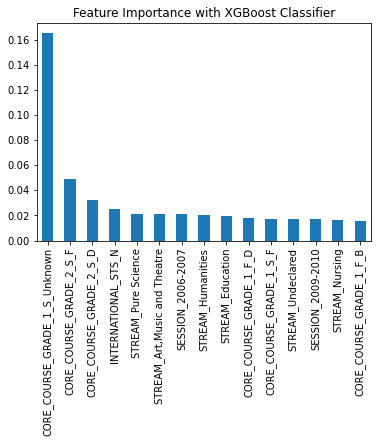

In [138]:
imp_feat.nlargest(15).plot(kind='bar')
plt.title('Feature Importance with XGBoost Classifier')
plt.show()

In [205]:
# taking probability of attrition alongwith StudentID 
prob=clf.predict_proba(X)
prob1=pd.DataFrame(prob)
prob1=prob1.iloc[:,1]
#print(prob1.head())
ID= data_result.loc[:,:]
#print(data_result.shape)
#print(ID.shape)
#print(prob1.shape)

ID=pd.concat([ID,prob1],axis=1,sort=False)
ID.to_csv(r'result.csv',index=False,header=True)

In [ ]:
#Our goal is to maximize the Recall.Undetected attrition are what actually creates costs for the university and students.
#However, if we increase the sensitivity (i.e. the Recall), we also increase the rate of 'false alarms'.
#Keeping false alarms small means keeping the Fallout small, or (almost) equivalently, keeping the Precision high. Hence, we will either:
# 1)Find a tradeoff between high Recall and low Fallout, or
# 2)simply maximize the F1-score, therefore 'maximizing' Precision and Recall at the same time

#Since Recall is maximum in XG Boost, i have tried to tune XGBoost hyperparameters in order to achieve better results.
#Follow the 2nd approach and try to maximize F1 score

In [119]:
import xgboost as xgb

In [120]:
#Grid Search for maximizing F1-score
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)
csv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [121]:
csv.best_params_,csv.best_score_

({'max_depth': 4, 'min_child_weight': 2}, 0.46769288318836655)

In [122]:
#Fixing max_depth=5,min_child_weight=1 obtained above and changing other parameters
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4,8]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 4, 'min_child_weight':2}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)
csv.best_params_

{'max_delta_step': 0, 'subsample': 1}

In [123]:
#Finally we search for an optimal leaning rate:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]}
fix_params['max_delta_step'] = 1
fix_params['subsample'] = 0.9
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_delta_step=1,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, validate_p

In [124]:
csv.best_params_

{'learning_rate': 0.3}

In [125]:
fix_params['learning_rate'] = 0.3
params_final =  fix_params
print(params_final)

{'learning_rate': 0.3, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 4, 'min_child_weight': 2, 'max_delta_step': 1, 'subsample': 0.9}


In [126]:
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_test = xgb.DMatrix(X_test, y_test)
xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

[17:22:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [127]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.4  #This can be changed and defined based upon our liking and appetite for taking risk
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc,prec,rec,f1)

[[748  58]
 [131  83]]
0.8147058823529412 0.5886524822695035 0.3878504672897196 0.4676056338028169


In [ ]:
#We can still play around with the probability threshold (thresh), such that Precision and Recall are to our liking.

In [38]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.3  #This can be changed and defined based upon our liking and appetite for taking risk
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc,prec,rec,f1)

[[706 100]
 [116  98]]
0.788235294117647 0.494949494949495 0.45794392523364486 0.47572815533980584


In [39]:
y_pred = xgb_final.predict(xgdmat_test)
thresh = 0.6  #This can be changed and defined based upon our liking and appetite for taking risk
y_pred [y_pred > thresh] = 1
y_pred [y_pred <= thresh] = 0
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(acc,prec,rec,f1)

[[781  25]
 [154  60]]
0.8245098039215686 0.7058823529411765 0.2803738317757009 0.4013377926421405
